In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

4.938271604938271


<IPython.core.display.Javascript object>


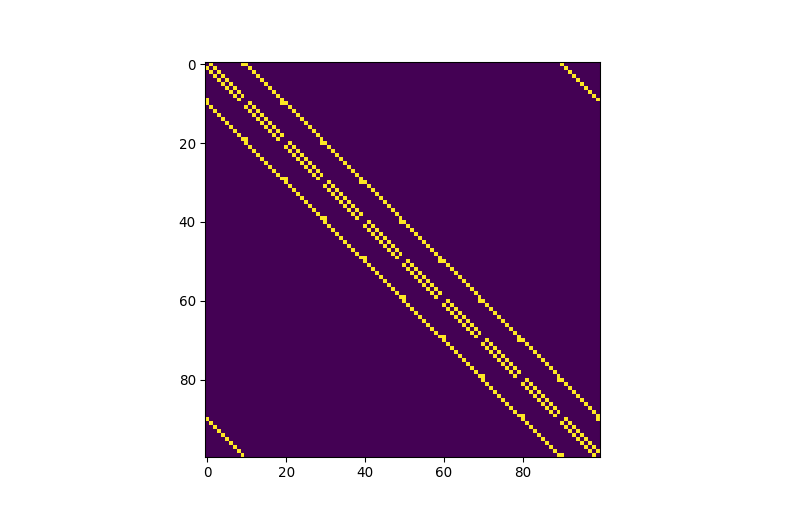

(1010,)


In [97]:
#define all needed variables
N = 10
phi = np.zeros(N)
omega = np.ones((N**2))#np.random.uniform(low=-1, high=1, size=(N**2))
# omega = omega**3 - 0.3*omega
K = 9.5

def make_A(N):
    #make an adjaceny matrix for an NxN systems where neighbors are connected. 
    #periodic boundary conditions
    A = np.zeros((N**2,N**2))
    #handle corners
    #top left
    A[0,1] = 1
    A[0,N-1] = 1
    A[0,N] = 1
    A[0, N**2 - N] = 1
    #bottom left
    A[N-1,0] = 1
    A[N-1,N-2] = 1
    A[N-1,N**2 - 1] = 1
    A[N-1, 2*N-1] = 1
#     top right
    A[ N**2 - N,  N**2 - N+1] = 1
    A[ N**2 - N, N**2 - 1] = 1
    A[ N**2 - N, 0] = 1
    A[ N**2 - N,  N**2 - 2*N] = 1
    #bottom right
    A[ N**2 - 1,  N**2 - N] = 1
    A[ N**2 - 1, N**2 - 2] = 1
    A[ N**2 - 1, N**2 - N-1] = 1
    A[ N**2 - 1,  N-1] = 1
    
    #first column
    for i in range(1, N-1):
        A[i, i + N] = 1
        A[i, N**2 - N + i] = 1
        A[i, i + 1] = 1
        A[i, i - 1] = 1
    #first column
    for i in range(1, N-1):
        A[N**2 - N + i, N**2 - N + i+1] = 1
        A[N**2 - N + i, N**2 - N + i-1] = 1
        A[N**2 - N + i, N**2 - 2*N + i] = 1
        A[N**2 - N + i, i] =1
    #first row
    for i in range(1, N-1):
        A[i*N, (i-1)*N] = 1
        A[i*N, (i+1)*N] = 1
        A[i*N, i*N + 1] = 1
        A[i*N, (i+1)*N - 1] = 1
    #last row
    for i in range(2, N):
        A[i*N-1, i*N-2] = 1
        A[i*N-1, i*N-N] = 1
        A[i*N-1, (i-1)*N-1] = 1
        A[i*N-1, (i+1)*N-1] = 1
    #middles
    for i in range(N+1, N**2-N-1):
        if(i%N != N-1) and (i%N != 0):
            A[i, i+1] = 1
            A[i, i-1] = 1
            A[i, i-N] = 1
            A[i, i+N] = 1
#     A = A + A.T
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N)
print(np.sum(A)/((N-1)**2))
plt.figure()
plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 10.1 #maximum time to run simulation for
t = np.arange(0, T_max, dt)
print(t.shape)

In [98]:
def phi_dot(phi, t, omega, K, A):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()

In [99]:
#do the integration part
A = make_A(N)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N**2)), np.arange(0, T_max, dt), args=(omega, K, A))

ValueError: setting an array element with a sequence.

(1010, 100)


<IPython.core.display.Javascript object>


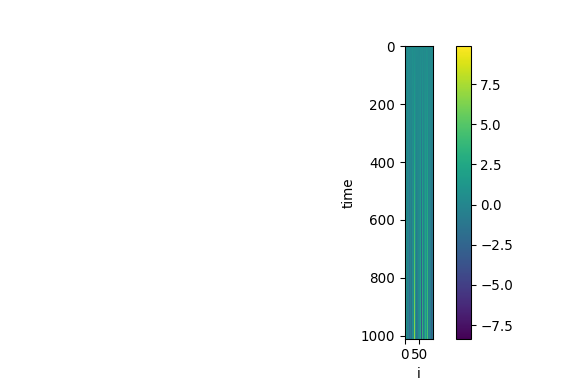

In [91]:
print(sol.shape)
plt.figure()
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


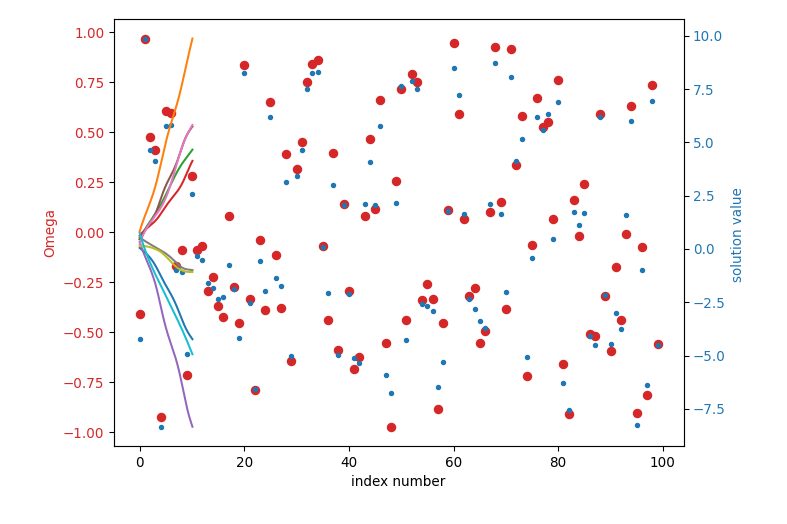

-0.008109767210755464


In [92]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('index number')
ax1.set_ylabel('Omega', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Solution at final timestep', color=color)  # we already handled the x-label with ax1
ax2.plot(sol[-1,:], '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [93]:
print(sol.shape)
# plt.plot(np.sin(sol[:,0]))
# plt.plot(sol[:,0])
# plt.plot(sol[:,1])
# plt.plot(sol[:,2])
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")

# plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

print(np.mean(omega))
# plt.plot(np.sin(sol[:,1]))
# plt.plot(np.sin(sol[:,2]))

(1010, 100)
-0.008109767210755464


<IPython.core.display.Javascript object>


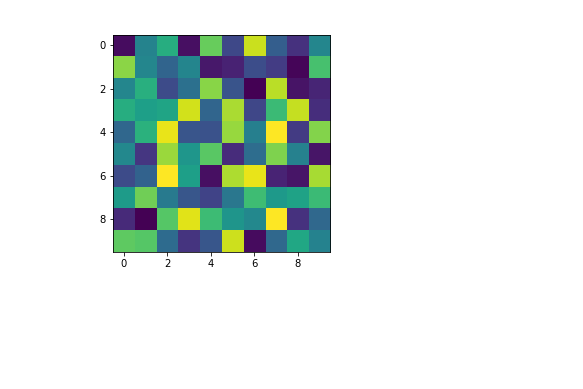

0


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

In [94]:
# # fig, ax = plt.subplots()
# fig.show()
# fig.canvas.draw()
# for i in range(int(dt*T_max)):
# # print(sol.shape)
#     ax.cla()
#     x = sol[i,:].reshape(N, -1).T
#     ax.imshow(x)
# #     plt.pause(0.1)
# #     ax.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

# for j in range(10):
for i in range(101):
    print(i)
    ax.clear()
    x = sol[i,:].reshape(N, -1).T
    ax.imshow(x)
    ax.colorbar()
    fig.canvas.draw()

In [10]:
u, s, vh = np.linalg.svd(sol)

In [11]:
plt.plot(s[:10])
print(s)
# plt.plot([0,100], [0,0])

[6.92027235e+01 1.31704770e+01 3.02699336e-01 2.27498074e-02
 1.21510597e-03 7.87463790e-05 5.86437060e-06 4.90366856e-07
 4.49824338e-08 3.81303947e-09 3.30684565e-10 2.08202674e-10
 9.13667373e-11 3.04625887e-11 1.91019974e-11 1.05993738e-11
 5.16157535e-12 1.89299313e-12 1.60012815e-12 9.95953058e-13
 3.68954484e-13 3.64126977e-13 5.86606822e-14 5.07841219e-14
 1.88601294e-14 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.74128238e-15 6.74128238e-15 6.74128238e-15
 6.74128238e-15 6.741282

In [12]:
n_important = 3

print(u[:,:n_important].shape)
print(np.diag(s[:n_important]).shape)
print(vh[:n_important,:].shape)
low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

(101, 3)
(3, 3)
(3, 100)


<IPython.core.display.Javascript object>


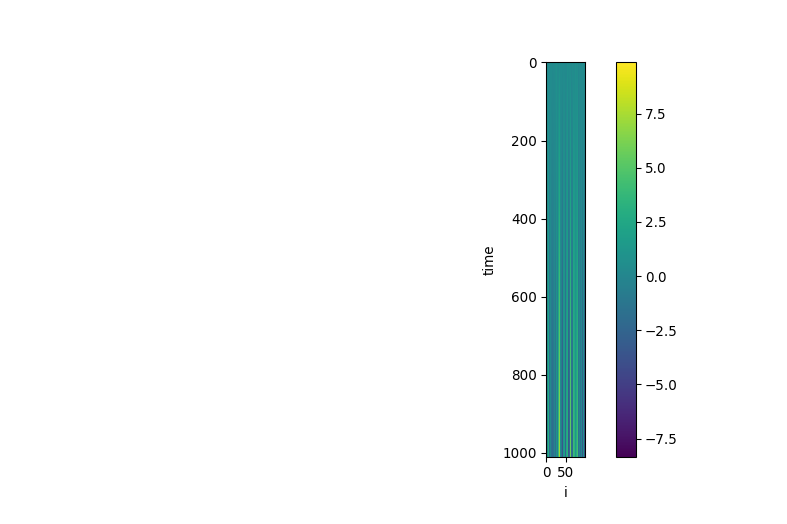

<IPython.core.display.Javascript object>


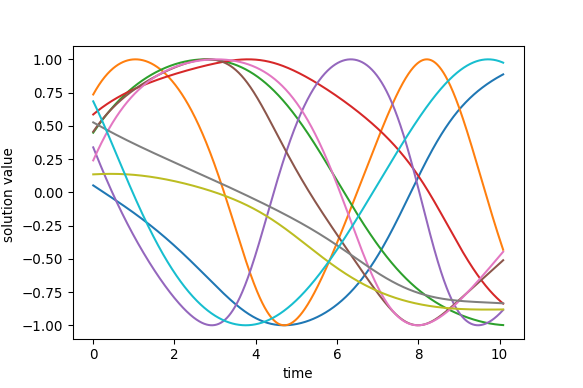

In [96]:
# print("MSE error = ", np.linalg.norm(low_rank - sol))

plt.figure()
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

# plt.imshow(low_rank)
# plt.xlabel("i")
# plt.ylabel("time")
# plt.colorbar()
# plt.show()

plt.figure()
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), np.sin(sol[:,i]))
plt.xlabel("time")
plt.ylabel("solution value ")
plt.show()


# for i in range(10):
#     plt.plot(np.arange(0, T_max, dt), low_rank[:,i])
# plt.xlabel("time")
# plt.ylabel("solution value ")
# plt.title("low rank solution")
# plt.show()


In [14]:
error_list = []
for i in range(10):
    u1, s1, vh1 = np.linalg.svd(sol, full_matrices=True)
    low_rank1 = (u1[:,:i]@np.diag(s1[:i]))@vh1[:i, :]
    error_list.append(np.linalg.norm(low_rank1 - sol))

In [15]:
plt.plot(error_list)
print(error_list)
print(s[:10])
# plt.plot(s[:10])

[70.44551477330339, 13.173974774634926, 0.30355547132723626, 0.022782371550186396, 0.0012176691456830264, 7.896597716833902e-05, 5.885009800262999e-06, 4.924406315460494e-07, 4.514555311507521e-08, 3.8342862494333615e-09]
[6.92027235e+01 1.31704770e+01 3.02699336e-01 2.27498074e-02
 1.21510597e-03 7.87463790e-05 5.86437060e-06 4.90366856e-07
 4.49824338e-08 3.81303947e-09]


In [16]:
#the svd stuff all in one block
n_important = 2
A = make_A(N, p = 0.1)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
u, s, vh = np.linalg.svd(sol)

low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

print("MSE error = ", np.linalg.norm(low_rank - sol))
print("MSE error end = ", np.linalg.norm(low_rank[:,-1] - sol[:, -1]))
print(s[:10])

plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time step number")
plt.title("full solution")
plt.colorbar()
plt.show()

plt.imshow(low_rank)
plt.xlabel("i")
plt.ylabel("time step number")
plt.title("low rank solution")
plt.colorbar()
plt.show()

for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("full solution")
plt.show()


for i in range(10):
    plt.plot(np.arange(0, T_max, dt), low_rank[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("low rank solution")
plt.show()

TypeError: make_A() got an unexpected keyword argument 'p'

In [ ]:
p = 0.1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
p = 0.2
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
p = 0.5
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
p = 1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
def phi_dot(phi, t, omega, K, A):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()
    
run_and_graph(omega, p = .1)
run_and_graph(omega, p = .2)
run_and_graph(omega, p = .5)
run_and_graph(omega, p = 1)

<IPython.core.display.Javascript object>


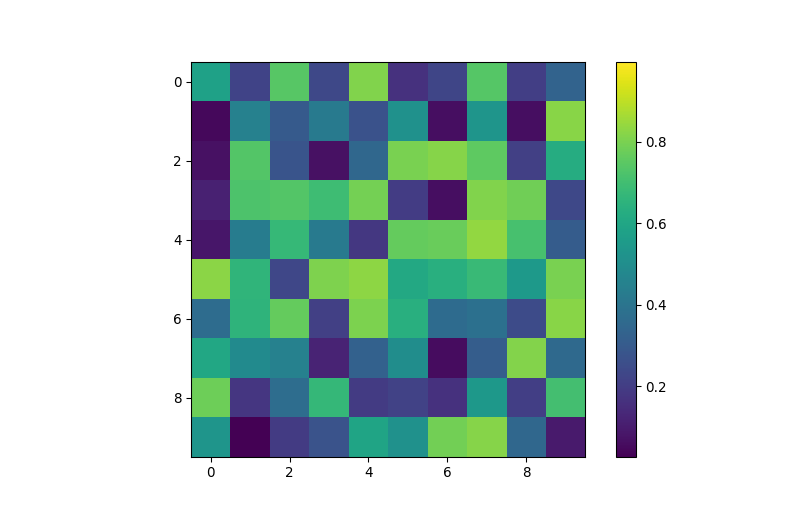

In [84]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()

x = sol[0,:].reshape(N, -1).T
im = plt.imshow(x, interpolation='none')
plt.colorbar()

# # # initialization function: plot the background of each frame
def init():
    im.set_array(np.sin(sol[0,:].reshape(N, -1).T))
    return im

# # animation function.  This is called sequentially
def animate(i):
    x = np.sin(sol[i,:].reshape(N, -1).T)
#     ax.imshow(x)
#     print(i)
#     if i % fps == 0:
#         print( '.', end ='' )

    im.set_array(x)
#     plt.title(i)
    return im

# im=plt.imshow(a,interpolation='none')
# initialization function: plot the background of each frame
# def init():
#     im.set_data(np.random.random((5,5)))
#     return im

# animation function.  This is called sequentially
# def animate(i):
#     a=im.get_array()
#     a=a*np.exp(-0.001*i)    # exponential decay of the values
#     im.set_array(a)
#     return im

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30)

plt.show()